# Continuous Signals

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Standard Signals

Certain [signals](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) play an important role in the theory and practical application of [signal processing](https://en.wikipedia.org/wiki/Signal_processing). They emerge from the theory of signals and systems, are used to characterize the properties of linear time-invariant (LTI) systems or frequently occur in practical applications. These standard signals are introduced and illustrated in the following. The treatise is limited to one-dimensional deterministic time- and amplitude-continuous signals.

### Complex Exponential Signal

The complex exponential signal is defined by the [complex exponential function](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x(t) = e^{s t} 
\end{equation}

where $s = \sigma + j \omega$ denotes the complex frequency with $\sigma, \omega \in \mathbb{R}$. The signal is often used as a generalized representation of harmonic signals. Using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula) above definition can be reformulated as

\begin{equation}
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted cosine/sine with angular frequency $\omega = 2 \pi f$. For $t>0$, the time-dependent weight $e^{\sigma t}$ is

* exponentially decaying over time for $\sigma < 0$,
* constantly one for $\sigma = 0$,
* exponentially growing over time for $\sigma > 0$,

and vice-versa for $t<0$. The complex exponential signal is used to model harmonic signals with exponentially decreasing or increasing amplitude.

**Example**

The following example illustrates the complex exponential signal and its parameters. The Python module [SymPy](http://docs.sympy.org/latest/index.html) is used for this purpose. It provides functionality for symbolic functions and mathematics. The required symbolic variables need to be defined explicitly before usage. In the example $t$, $\omega$ and $\sigma$ are defined as symbolic variables, followed by the definition of the exponential signal itself.

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

Now specific values for the complex frequency $s = \sigma + j \omega$ are considered for illustration. A new signal is defined by substituting both $\sigma$ and $\omega$ with specific values. The real and imaginary part of the signal is plotted for illustration.

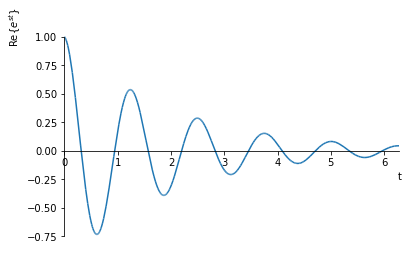

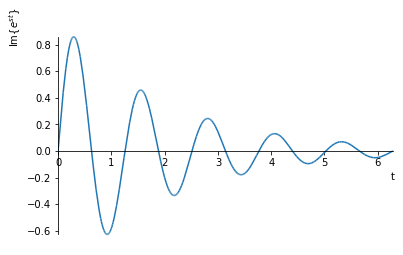

In [2]:
y = x.subs({omega: 5, sigma : -.5})

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}');

**Exercise**

* Try out other values for `omega` and `sigma` to create signals with increasing/constant/decreasing amplitude and different frequencies.

### Dirac Impulse

The Dirac impulse is one of the most important signals in the theory of signals and systems. It is used for the characterization of LTI systems and the modeling of impulse-like signals. The Dirac impulse is defined by way of the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function) which is not a function in the conventional sense. It is a generalized function or *distribution*. The Dirac impulse is denoted as $\delta(t)$. The Dirac delta function is defined by its effect on other functions. A rigorous treatment is beyond the scope of this course material. Please refer to the literature for a detailed discussion of the mathematical foundations of the Dirac delta distribution. Fortunately for its application in signal processing it is suitable to consider only certain properties. The most relevant ones are

1. **Sifting property**
    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    where $x(t)$ needs to be differentiable at $t=0$. The sifting property implies $\int_{-\infty}^{\infty} \delta(t) = 1$.
    
2. **Multiplication**
    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    where $x(t)$ needs to be differentiable at $t=0$.
    
3. **Linearity**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
4. **Scaling**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}
    where $a \in \mathbb{R} \setminus 0$. This implies that the Dirac impulse is a function with even symmetry.
    
5. **Derivation**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

It is important to note that the product $\delta(t) \cdot \delta(t)$ of two Dirac impulses is not defined.

**Example**

This example illustrates some of the basic properties of the Dirac impulse. Let's first define a Dirac impulse by way of the Dirac delta function

In [3]:
delta = sym.DiracDelta(t)
delta

Now let's check the sifting property by defining an arbitrary signal (function) $f(t)$ and integrating over its product with the Delta impulse

In [4]:
f = sym.Function('f')(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

**Exercise**

* Derive the sifting property for a shifted Dirac impulse $\delta(t-\tau)$ and check your results by modifing above example.

### Heaviside Signal

The Heaviside signal is defined by the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)

\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  1 & t \geq 0 \end{cases}
\end{equation}

Note that different definitions exist that differ with respect to the value of $\epsilon(t)$ at $t=0$. The Heaviside signal is used to represent a signal that switches on at a specified time and stays switched on indefinitely. The Heaviside signal can be related to the Dirac impulse by

\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = \epsilon(t)
\end{equation}

**Example**

In the following, a Heaviside signal $\epsilon(t)$ is defined and plotted. Note that `Sympy` denotes the Heaviside function by $\theta(t)$.

In [5]:
step = sym.Heaviside(t)
step

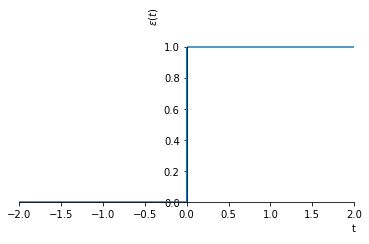

In [6]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

Let's construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=0$. Considering the definition of the Heaviside function, the desired signal is given as 

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

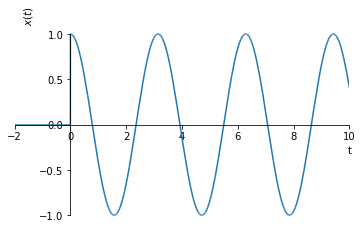

In [7]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega,2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

### Rectangular Signal

The rectangular signal is defined by the [rectangular function](https://en.wikipedia.org/wiki/Rectangular_function)

\begin{equation}
\text{rect}(t) = \begin{cases} 1 & \text{for } |t| < \frac{1}{2} \\ 0 & \text{otherwise}  \end{cases}
\end{equation}

Note that different definitions exist that differ with respect to the value of $\text{rect}(t)$ at $t = \pm \frac{1}{2}$. The rectangular signal is used to represent a signal which is switched on for a limited period of time or has finite duration. The rectangular signal can be related to the Heaviside signal by

\begin{equation}
\text{rect}(t) = \epsilon \left(t + \frac{1}{2} \right) - \epsilon \left(t - \frac{1}{2} \right)
\end{equation}

**Example**

The Heaviside function is used to define a rectangular function in `Sympy`. This function is then used as rectangular signal.

In [8]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

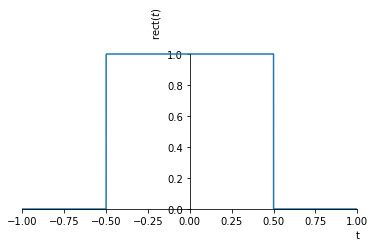

In [9]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

**Exercise**

* Use $\text{rect}(t)$ to construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=-\frac{1}{2}$ and switched off at $t=+\frac{1}{2}$.

### Sign Signal

The sign signal is defined by the [sign/signum function](https://en.wikipedia.org/wiki/Sign_function) which evaluates the sign of its argument

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

The sign signal is useful to represent the absolute value of a signal $x(t)$ by a multiplication

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

It is related to the Heaviside function by

\begin{equation}
\text{sgn}(t) = 2 \cdot \epsilon(t) - 1
\end{equation}

**Example**

The following example illustrates the sign signal $\text{sgn}(t)$. Note that the sign function is represented as $\text{sign}(t)$ in `Sympy`.

In [10]:
sgn = sym.sign(t)
sgn

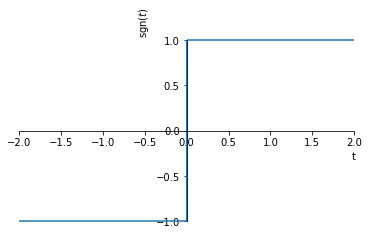

In [11]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

**Exercise**

* Check the values of $\text{sgn}(t)$ for $t \to 0^-$, $t = 0$ and $t \to 0^+$ as implemented in `SymPy`. Do they conform to above definition?

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.